# Data Processing, Visualisation, t-stat Model

## Visualizing Data in Python: Histograms

When working with a new dataset, one of the most useful things to do is to visualize the data. By using visual tools, we can get a better idea of what the data may be trying to tell us and we can gain insights into the data that we may not discover otherwise.

Let's learn how to perform basic visualisations in Python, and, learn how to begin exploring any data. THis week we will explore HIstogram plots.

We can draw a histogram in Python using libraries like $Matplotlib$ or $Seaborn$. $Matplotlib$ is great for direct control and simplier (in my view) syntaxis, while $Seaborn$ provides more aesthetically pleasing defaults and additional features.


In [4]:
#### Importing libriaries
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#### This week we will use trip file, let's save file location path in a variable url, as usual
urltripv = "tripv2pub.csv"
urlhhv = "hhv2pub.csv"
urlperv = "perv2pub.csv"

#### Read the .csv files using `pandas` libriary and store it as a `pandas` Data Frame
dtripv = pd.read_csv(urltripv)
dhhv = pd.read_csv(urlhhv)
dperv = pd.read_csv(urlperv)

#### Let's now check what data type we stored into `df`. This code will output object type
pd.set_option('display.max_columns', None)

In [6]:
dtripv.head()

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
0,9000013002,1,1,1,900001300201,1,2,1,1,1,2,75,2,3,1,50,15,1435,1450,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,15,2,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020101,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11
1,9000013002,1,2,2,900001300201,1,2,1,1,1,2,-9,2,3,15,1,10,1605,1615,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,1,1,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020102,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,2,10,2,2,1,80,30,700,730,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-1,17.077067,2.208973e+06,0.0,2.274239e+06,90000130020201,17.077067,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,2,10,2,5,12,80,10,740,750,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-9,4.748291,2.208973e+06,0.0,2.274239e+06,90000130020202,4.748291,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,2,-9,2,2,12,1,30,800,830,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,1,-9,14.098819,2.208973e+06,0.0,2.274239e+06,90000130020203,14.098819,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11


In [7]:
dhhv.head()

,HOUSEID,WTHHFIN,WTHHFIN5D,WTHHFIN2D,NUMADLT,HOMEOWN,HOMETYPE,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CNTTDHH,CDIVMSAR,FLAG100,HHFAMINC,HHFAMINC_IMP,HH_RACE,HHSIZE,HHVEHCNT,HHRELATD,LIF_CYC,MSACAT,MSASIZE,TRAVDAY,URBAN,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID
0,9000013002,4621.758002,0.000000,13946.191168,2,1,1,1,1,1,2,2,7,11,1,11,11,1,4,2,1,4,1,5,1,1,4,1,2,0,4,1,202202,1,1021
1,9000013016,2982.998407,3878.814279,0.000000,2,3,3,2,1,1,2,2,6,13,1,7,7,1,2,1,1,2,3,3,4,1,2,1,0,0,2,1,202202,2,1021
2,9000013026,9979.573402,14700.796695,0.000000,1,3,3,1,1,1,2,1,0,11,1,10,10,1,1,0,2,1,1,5,3,1,4,1,0,0,1,1,202202,1,1021
3,9000013039,10355.890735,13150.678996,0.000000,2,3,3,1,1,1,2,2,2,11,1,7,7,1,4,1,1,6,1,4,5,1,4,1,2,0,4,1,202201,1,1021
4,9000013041,4926.862529,7061.357485,0.000000,1,1,2,2,1,1,2,1,0,12,1,11,11,1,1,1,2,1,2,4,2,1,3,1,0,0,1,1,202201,1,1021


In [8]:
dperv.head()

,HOUSEID,PERSONID,WTPERFIN,WTPERFIN5D,WTPERFIN2D,R_AGE,R_SEX,R_RELAT,WORKER,DRIVER,R_RACE,GCDWORK,OUTOFTWN,USEPUBTR,R_RACE_IMP,R_HISP,PROXY,WHOPROXY,EDUC,LAST30_TAXI,LAST30_RDSHR,LAST30_ESCT,LAST30_PT,LAST30_MTRC,LAST30_WALK,LAST30_BIKE,LAST30_BKSHR,TAXISERVICE,RIDESHARE22,ESCOOTERUSED,PTUSED,TRNPASS,MCTRANSIT,WALKTRANSIT,BIKETRANSIT,BIKESHARE22,USAGE1,USAGE2_1,USAGE2_2,USAGE2_3,USAGE2_4,USAGE2_5,USAGE2_6,USAGE2_7,USAGE2_8,USAGE2_9,USAGE2_10,QACSLAN1,QACSLAN3,PAYPROF,PRMACT,EMPLOYMENT2,DRIVINGOCCUPATION,DRIVINGVEHICLE,WRKLOC,WKFMHM22,WRKTRANS,EMPPASS,SCHOOL1,STUDE,SCHTYP,SCHOOL1C,SCHTRN1,DELIVER,DELIV_GOOD,DELIV_FOOD,DELIV_GROC,DELIV_PERS,RET_HOME,RET_PUF,RET_AMZ,RET_STORE,MEDCOND,MEDCOND6,W_CANE,W_WKCR,W_VISIMP,W_SCCH,W_CHAIR,W_NONE,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDSHARE,CONDNONE,CONDRF,FRSTHM,PARK,PARKHOME,PARKHOMEAMT,PARKHOMEAMT_PAMOUNT,PARKHOMEAMT_PAYTYPE,SAMEPLC,COV1_WK,COV1_SCH,COV1_PT,COV1_OHD,COV2_WK,COV2_SCH,COV2_PT,COV2_OHD,CNTTDTR,R_SEX_IMP,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,TRAVDAY,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,HHFAMINC_IMP,WBHUR,SBHUR,WTHTNRNT,WTPPOPDN,WTRESDN,WTEEMPDN,WBHTNRNT,WBPPOPDN,WBRESDN,STHTNRNT,STPPOPDN,STRESDN,STEEMPDN,SBHTNRNT,SBPPOPDN,SBRESDN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,9000013002,1,3938.688806,0.000000,13363.809355,39,2,7,2,1,1,-1.000000,2,2,1,2,1,-1,7,2,2,2,2,2,1,2,-1,-1,-1,-1,-1,-1,-1,10,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,2,3,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,10,10,0,0,0,0,2,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,-1,-1.0,-1,-1,-1,-1,3,2,-1,-1,1,-1,2,2,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,20,4,2,5,5,4,3
1,9000013002,2,5409.514573,0.000000,19360.094919,42,1,1,1,1,1,-9.000000,2,2,1,2,2,1,7,2,2,2,2,2,1,2,-1,-1,-1,-1,-1,-1,-1,3,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,1,-1,55,2,-1,1,4,-1,-1,2,-1,-1,-1,-1,12,12,0,0,0,0,2,0,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1.0,-1,-1,3,-1,3,2,2,-1,-8,-1,3,1,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,20,4,2,5,5,4,3
2,9000013002,3,3013.582163,0.000000,7285.044994,8,-7,2,-1,-1,1,-1.000000,2,2,1,2,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1.0,-1,97,-1,2,2,2,-1,-1,-1,-1,0,1,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,11,-1,4,-1,-1,-1,-1,-1,-1,-1,20,4,2,5,5,4,3,4,20,4,2,5,5,4,3
3,9000013002,4,6214.108740,0.000000,27109.336829,5,-7,2,-1,-1,1,-1.000000,2,2,1,2,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1.0,-1,-1,-1,2,2,2,-1,-1,-1,-1,2,1,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,1,4,1,202202,1,1021,11,-1,4,-1,-1,-1,-1,-1,-1,-1,20,4,2,5,5,4,3,4,20,4,2,5,5,4,3
4,9000013016,1,3183.420810,4177.234452,0.000000,32,2,7,1,1,1,4.882451,2,2,1,2,1,-1,6,2,2,2,2,2,1,2,-1,-1,-1,-1,-1,-1,-1,3,-1,-1,1,2,2,2,2,2,2,1,2,2,1,2,-1,1,-1,30,1,3,2,1,1,-1,2,-1,-1,-1,-1,10,8,2,-9,-9,-9,-9,2,1,1,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,1,2,-1,-1,-1.0,-1,-1,3,-1,3,1,2,-1,-8,-8,3,2,2,3,2,1,1,2,2,13,7,1,2,1,2,3,3,4,1,2,1,202202,2,1021,7,2,-1,20,3,2,4,20,3,2,-1,-1,-1,-1,-1,-1,-1,3,80,7,3,8,90,7,6


## Simple Histogram with Matplot
Only for numeric data!

In [9]:
dhhv['HOMETYPE'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

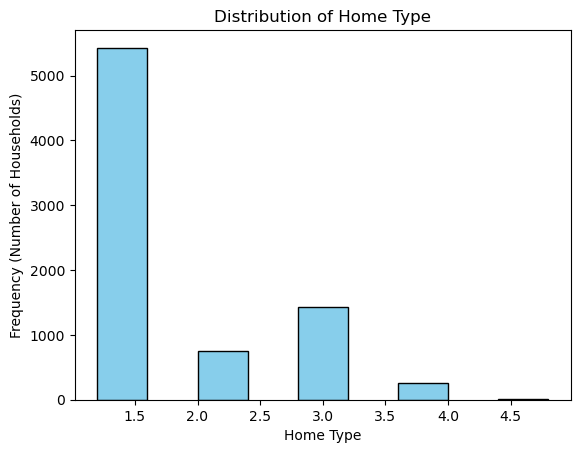

In [17]:
### Choose the column to represent as a histogram
data = dhhv['HOMETYPE']

### Create the histogram
plt.hist(data, bins = 5, color = 'skyblue', edgecolor = 'black',rwidth=0.5)

### Add titles and labels for clarity
plt.title('Distribution of Home Type')
plt.xlabel('Home Type')
plt.ylabel('Frequency (Number of Households)')

# ### Show the plot
plt.show()

## Histogram Using Seaborn

$Seaborn$ is built on top of $Matplotlib$ and often produces more attractive plots with less code. The function is sns.histplot().

A key feature of $Seaborn's$ histogram is the ability to easily overlay a Kernel Density Estimate (KDE) line, which is a smooth curve that estimates the probability density of the data.

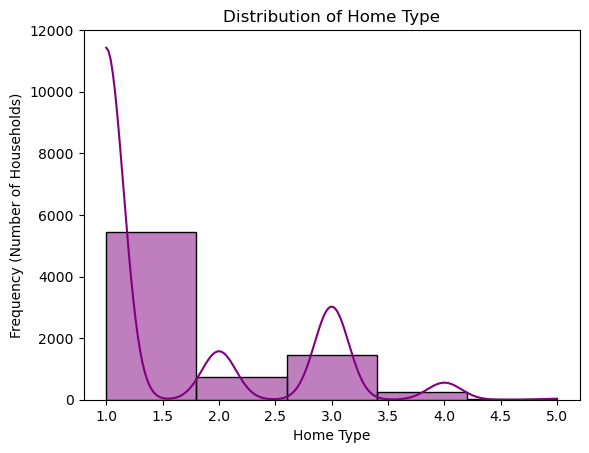

In [13]:
### Create the histogram with a KDE curve
sns.histplot(data, bins = 5, kde = True, color = 'purple')

### Add titles and labels
plt.title('Distribution of Home Type')
plt.xlabel('Home Type')
plt.ylabel('Frequency (Number of Households)')

### Show the plot
plt.show()

Let's use other data to better demostrate this differentce. For that, let's select the column with continious values, for example dtripv.TRVLCMIN - trvale time of the trip in minutes

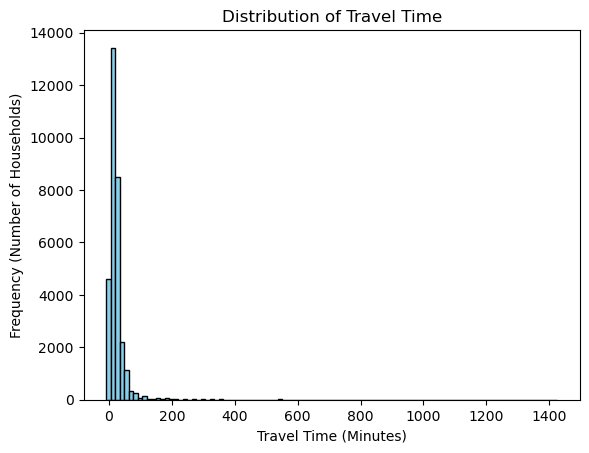

In [ ]:
### Choose the column to represent as a histogram
data2 = dtripv.TRVLCMIN

### Create the histogram
plt.hist(data2, bins = 100, color = 'skyblue', edgecolor = 'black')

### Add titles and labels for clarity
plt.title('Distribution of Travel Time')
plt.xlabel('Travel Time (Minutes)')
plt.ylabel('Frequency (Number of Trips)')

### Show the plot
plt.show()

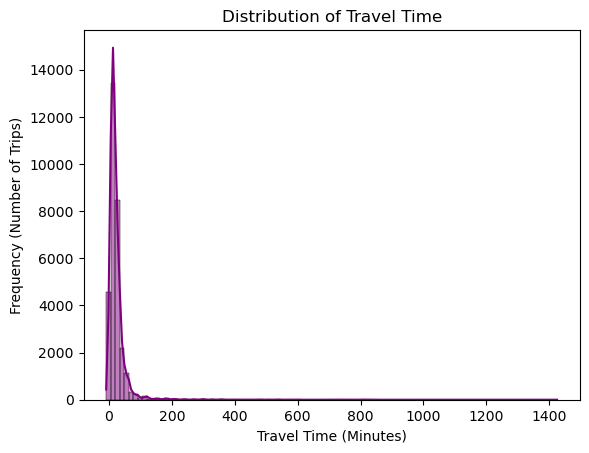

In [20]:
### Create the histogram with a KDE curve
sns.histplot(data2, bins = 100, kde = True, color = 'purple')

### Add titles and labels
plt.title('Distribution of Travel Time')
plt.xlabel('Travel Time (Minutes)')
plt.ylabel('Frequency (Number of Trips)')

### Show the plot
plt.show()

In [21]:
### Still, does not look right
### Let's look at travel time data closer
dtripv.groupby(["TRVLCMIN"]).size()

TRVLCMIN
-9        21
 0         4
 1       155
 2       359
 3       363
        ... 
 1080      1
 1140      1
 1300      1
 1382      1
 1425      1
Length: 188, dtype: int64

There are 21 values with -9 travel time equal to "-9". We would prefer to avoide using these data points for or analysis as "-9" means missing value and npt a real travel time.
Also, there are some data points with large values (e.g., 1080, 1140, 1300). 
These are outliers that can be a result of entering errors or long trips mixwd with daily trips.
How we can remove those entries from the consideration?

In [22]:
condition1 = (dtripv['TRVLCMIN'] > 200) | (dtripv['TRVLCMIN'] < 0)
print (condition1[1050:1060])

1050    False
1051    False
1052    False
1053    False
1054    False
1055    False
1056    False
1057    False
1058    False
1059    False
Name: TRVLCMIN, dtype: bool


In [ ]:
### Let's create a new data frame based on dtripv, but without those problematic entries
dt = dtripv.drop(dtripv[condition1].index)

In [26]:
dt.groupby(["TRVLCMIN"]).size()

TRVLCMIN
0        4
1      155
2      359
3      363
4      243
      ... 
190      5
194      1
195      5
197      1
200      3
Length: 116, dtype: int64

In [28]:
display(dt.describe())
display(dtripv.describe())

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
count,3.080600e+04,30806.000000,30806.000000,30806.000000,3.080600e+04,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,3.080600e+04,3.080600e+04,3.080600e+04,3.080600e+04,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000,30806.000000
mean,9.000116e+09,1.681166,2.445205,2.443063,7.630787e+11,1.043758,1.142213,0.776732,1.723431,3.810946,1.989061,95.737616,1.988996,3.153899,7.156560,26.905798,21.296468,1332.726417,1362.442024,1.040966,1.080114,3.895507,1.995098,1.243816,1.130234,0.187171,-0.225054,-0.642732,-0.879699,-0.954230,-0.976725,-0.993378,-0.999805,0.414075,1.581023,3.326040,0.987308,1.426281,3.771733,-0.801699,-0.986691,83.083912,7.433487,-0.210349,10.209109,8.169170e+06,5.825324e+06,2.292141e+06,9.000116e+13,6.311495,397.878618,5.314127,2.058430,1.655165,1.775011,5.141433,2.651626,1.924041,1.992794,53.704895,7.258489,2.668344,2.823541,2.133480,5.811498,2.290560,3.533078,1.651594,4.137181,1.188470,202211.711095,1.304291,1029.490489,46.805460,1.430630,1.126177,0.855742,2.854801,1.916120,1.268032,4.715153,4.700967,1.504285,1.726384,7.414432
std,5.833353e+04,0.999861,1.795656,1.793907,3.232552e+11,0.204559,1.341556,0.785032,0.447309,1.963512,0.104020,164.483433,0.104325,1.444391,6.834795,27.573945,20.098034,421.199278,422.792298,0.512347,1.092601,5.048792,3.488410,0.429390,0.983841,1.336911,1.216170,0.912748,0.565357,0.352304,0.254568,0.136581,0.024172,3.398531,0.891105,14.869853,0.831182,0.973802,15.908035,8.776987,0.207828,913.061972,6.955828,4.076373,36.556898,1.086122e+07,9.574779e+06,5.826022e+06,5.833353e+08,21.311966,68.432587,3.983154,0.761917,0.813452,0.417582,2.487135,1.012361,0.264937,0.795222,24.906896,2.864378,11.821203,1.448491,1.078408,3.250692,0.856725,1.552185,1.165171,1.664745,0.391093,20.165107,0.947880,4.983800,20.763892,0.932649,0.872240,0.647042,12.496325,0.277212,0.442942,2.409279,19.297873,0.499990,1.564173,2.446546
min,9.000013e+09,1.000000,1.000000,1.000000,-1.000000e+00,1.000000,-1.000000,-9.000000,1.000000,1.000000,1.000000,-9.000000,1.000000,-9.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,-9.000000,-1.000000,-1.000000,-9.000000,-1.000000,-1.000000,-1.000000,1.000000,-9.000000,-9.000000,3.369513e+04,0.000000e+00,0.000000e+00,9.000013e+13,-9.000000,272.700000,1.000000,1.000000

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
count,3.107400e+04,31074.000000,31074.000000,31074.000000,3.107400e+04,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.00000,31074.000000,31074.000000,3.107400e+04,3.107400e+04,3.107400e+04,3.107400e+04,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000
mean,9.000116e+09,1.681438,2.437826,2.435702,7.619426e+11,1.048529,1.141308,0.775407,1.722276,3.810066,1.988704,95.176611,1.989026,3.156723,7.185943,26.856311,24.547821,1329.818337,1363.067613,1.041063,1.076945,3.906159,1.997265,1.243644,1.129336,0.185267,-0.226427,-0.644236,-0.880543,-0.954464,-0.976830,-0.993338,-0.999710,0.414140,1.583124,3.333526,0.986774,1.423505,3.786606,-0.802894,-0.986677,82.358853,7.43390,-0.210272,13.965150,8.166137e+06,5.815804e+06,2.302368e+06,9.000116e+13,7.527313,397.951262,5.351805,2.058506,1.654921,1.775729,5.143046,2.652346,1.924117,1.993242,53.722565,7.260636,2.677029,2.821941,2.134453,5.812737,2.292109,3.530926,1.653086,4.137478,1.188968,202211.691543,1.303694,1029.494240,46.800830,1.430617,1.126504,0.855892,2.859014,1.916071,1.268198,4.716097,4.710755,1.503926,1.724657,7.415814
std,5.829379e+04,0.999429,1.791504,1.789758,3.243517e+11,0.214885,1.341822,0.787571,0.447884,1.966057,0.105681,164.311604,0.104181,1.445374,6.851472,27.561324,46.483373,422.927312,425.447364,0.514696,1.094555,5.054558,3.477865,0.429287,0.982799,1.336076,1.215187,0.911104,0.563497,0.351382,0.254039,0.137048,0.029476,3.387813,0.891605,14.903745,0.833239,0.975625,15.956259,8.739298,0.207546,909.149169,6.99431,4.073497,85.416700,1.083988e+07,9.561997e+06,5.831630e+06,5.829379e+08,32.176230,68.455342,4.189875,0.761605,0.813206,0.417108,2.485935,1.011683,0.264816,0.794912,24.895858,2.861425,11.855930,1.446787,1.078400,3.251390,0.856474,1.552468,1.166259,1.665612,0.391490,20.136521,0.947416,4.982031,20.765643,0.931312,0.872042,0.646882,12.512009,0.277285,0.443029,2.409187,19.318665,0.499993,1.567172,2.445626
min,9.000013e+09,1.000000,1.000000,1.000000,-1.000000e+00,1.000000,-1.000000,-9.000000,1.000000,1.000000,1.000000,-9.000000,1.000000,-9.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,-9.000000,-1.000000,-1.000000,-9.000000,-1.000000,-1.000000,-1.000000,1.00000,-9.000000,-9.000000,3.369513e+04,0.000000e+00,0.000000e+00,9.000013e+13,-9.000000,272.700000,1.000000,1.000000,

Let's try now!

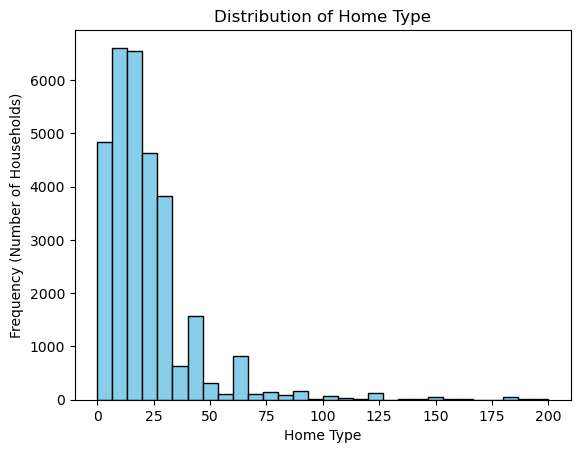

In [27]:
### Choose the column to represent as a histogram
data3 = dt.TRVLCMIN

### Create the histogram
plt.hist(data3, bins = 30, color = 'skyblue', edgecolor = 'black')

### Add titles and labels for clarity
plt.title('Distribution of Home Type')
plt.xlabel('Home Type')
plt.ylabel('Frequency (Number of Households)')

### Show the plot
plt.show()

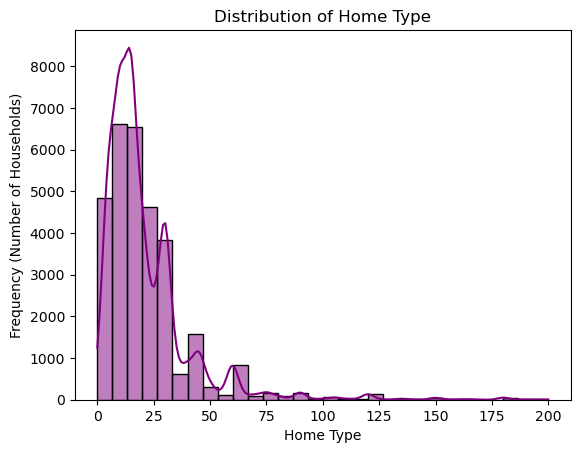

In [29]:
### Create the histogram with a KDE curve
sns.histplot(data3, bins = 30, kde = True, color = 'purple')

### Add titles and labels
plt.title('Distribution of Home Type')
plt.xlabel('Home Type')
plt.ylabel('Frequency (Number of Households)')

### Show the plot
plt.show()

# Confidence Intervals and T-Stat

**T-statistic** is the ratio of the difference in a number’s estimated value from its assumed value to its standard error. The **t-statistic** is used in a **t-test** to determine whether to support or reject the null hypothesis. 

It is very similar to the **z-score** but with the difference that **t-statistic** is used when the sample size is small or the population standard deviation is unknown. 

What exactly is a **confidence interval**? A **confidence interval** is the an interval bounded by two values: **mean** of your estimate plus and minus the **variation** in that estimate. This is the range of values you expect your estimate to fall between if you redo your test, within a certain **level of confidence**. Hence, to construct **confidence interval** on some data we need **mean**, **variance**, and desired **confidence level*. 


For more on confidence level check [this](https://seeing-theory.brown.edu/frequentist-inference/index.html#section2) or [this](https://rpsychologist.com/d3/ci/). 

# Statsmodels library
Today we will learn how to use thos library to perform **t-test** and to get **confidence interval**. You can use $Statsmodels$ Python libriary to obtain the more information on this library functional.

[Statsmodels](https://www.statsmodels.org/stable/index.html) is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

In [61]:
### Create an object that has descriptive statistics as variables using statsmodels libriary functionality
stored_descr_stat_tripv = sm.stats.DescrStatsW(dtripv.TRVLCMIN)

print(stored_descr_stat_tripv)
print("Type of this object is: ", type(stored_descr_stat_tripv))

Type of this object is:  <class 'statsmodels.stats.weightstats.DescrStatsW'>


As you can see from the above output, we have created an object with type: "statsmodels.stats.weightstats.DescrStatsW".  
This object stores various descriptive statistics such as mean, standard deviation, variance, ect. that we can access.

More about this method can be found here:
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [31]:
### Extracting mean value
print("Mean: ", stored_descr_stat_tripv.mean)

### Extracting standard deviation value
print("Standard deviation: ", stored_descr_stat_tripv.std)

### Extracting variance value
print("Variance: ", stored_descr_stat_tripv.var)

Mean:  24.547821329729032
Standard deviation:  46.48262474255931
Variance:  2160.6344029575866


In [32]:
### Let's repeat for updated data set
stored_descr_stat_t = sm.stats.DescrStatsW(dt.TRVLCMIN)

### Extracting mean value
print("Mean: ", stored_descr_stat_t.mean)

### Extracting standard deviation value
print("Standard deviation: ", stored_descr_stat_t.std)

### Extracting variance value
print("Variance: ", stored_descr_stat_t.var)

Mean:  21.29646822047653
Standard deviation:  20.09770763615131
Variance:  403.9178522282147


The output above shows the mean, standard deviation, and variance of the *TRVLCMIN* variables. There are other interesting things you can do with this object (*stored_descr_stat*), such as generating confidence intervals and hypothesis testing, which are more difficualt to do with other libriarys.


Now, let's create some instrumental variables to be able to use them for the analysis.
Example of instrumental variable: _male, has driving license, part of the household with at least 3 members, and is retired_


This information should be in the person data set _dperv_, but some of those values are part of _dt_ too. Let's check! 
- Male: column R_SEX_IMP = 01
- Has DL: column DRIVER = 01
- Married: column HHSIZE > 02
- Retired: column PRMACT = 05

In [33]:
dt.groupby(['R_SEX_IMP']).size()

R_SEX_IMP
1    15271
2    15535
dtype: int64

In [34]:
dt.groupby(['DRIVER']).size()

DRIVER
-1     2997
 1    26259
 2     1550
dtype: int64

In [35]:
dt.groupby(['HHSIZE']).size()

HHSIZE
1      4388
2     12354
3      4847
4      4978
5      2866
6       846
7       265
8       188
9        72
10        2
dtype: int64

In [36]:
dt.groupby(['PRMACT']).size()

PRMACT
-1     19945
 1       294
 2       577
 3      1332
 4       719
 5      6670
 97     1269
dtype: int64

In [41]:
### Create a condition that capture all 4 features
condition2 = ((dt['R_SEX_IMP'] == 1) & (dt['DRIVER'] == 1) & (dt['HHSIZE'] > 2) & (dt['PRMACT'] == 5))
print("Type of the variable condition2: ", type(condition2))
condition2

Type of the variable condition2:  <class 'pandas.core.series.Series'>


0        False
1        False
2        False
3        False
4        False
         ...  
31069    False
31070    False
31071    False
31072    False
31073    False
Length: 30806, dtype: bool

In [40]:
print("First 5 enries of the condition2:")
print(condition2.head())
print("Mean value of the all entries of the condition2: ", condition2.mean())

First 5 enries of the condition2:
0    False
1    False
2    False
3    False
4    False
dtype: bool
Mean value of the all entries of the condition2:  0.012205414529637084


In [46]:
print(condition2.sample(10)) # Print randomple selected 10 elements

28628    False
26911    False
2303     False
15719    False
3549     False
23383    False
18131    False
273      False
28942    False
20642    False
dtype: bool


In [48]:
condition2.shape

(30806,)

In [49]:
condition2.describe()

count     30806
unique        2
top       False
freq      30430
dtype: object

In [50]:
condition2.unique()

array([False,  True])

In [51]:
condition2.count()

30806

In [52]:
condition2.values # Returns the values as a numpy array.

array([False, False, False, ..., False, False, False])

In [53]:
dt['MDLHH3R'] = condition2

In [54]:
### Let's what is a distribution of the new column

results = dt.groupby('MDLHH3R').size()

print("~Here are the results of groupping based on condition 2~")
print(results)

~Here are the results of groupping based on condition 2~
MDLHH3R
False    30430
True       376
dtype: int64


In [55]:
### What is a percent of the entries that satisfies out request?

print(round(results.iloc[1]/(results.iloc[0] + results.iloc[1]) * 100, 2), "%")

1.22 %


# Confidence Interval for a Binomial Proportion

A binomial proportion confidence interval is a **confidence interval** for the probability of success calculated from the outcome of a series of success–failure experiments (Bernoulli trials where success is defined as "1" and failure is defined as "0"). 


*statsmodels.stats.proportion.proportion _ confint(count, nobs, alpha = 0.05, method = 'normal')*

**count:** {int or float, array_like}

    number of successes, can be pandas Series or DataFrame. Arrays must contain integer values if method is “binom_test”.

**nobs:** {int or float, array_like}

    total number of trials. Arrays must contain integer values if method is “binom_test”.

**alpha:** float

    Significance level, default 0.05. Must be in (0, 1)

**method:** {normal, agresti_coull, beta, wilson, binom_test}

    default: “normal” method to use for confidence interval. 

In [58]:
publictransitgrouping = dtripv.groupby("PUBTRANS").size()
print(publictransitgrouping)


PUBTRANS
1      341
2    30733
dtype: int64


In [ ]:
#### Choose confidence interval for a population proportion
alpha = 0.01

#### Input population proportion
positive = publictransitgrouping[1]

#### Input size of population
number = sum(publictransitgrouping)

#### Construct confidence interval
sm.stats.proportion_confint(positive, number, alpha)

(0.009451501811293065, 0.012496107122220483)

That code calculates a 99% confidence interval for a population proportion that uses public trabsit.

#  Let's  construct confidence interval for data set manually
For that we will need:
- mean value of the data set
- st.deviation of the data set
- desired level of confidence (we will use t-stat)
We can use sm.stats to obtain some of those values.

First, Let's use Stats to get discriptive statistics

## Discriptive Statistics
Here is the function for

*statsmodels.stats.weightstats.DescrStatsW(data, weights = None, ddof = 0)*

**data:** array_like, 1-D or 2-D

dataset

**weights:** None or 1-D ndarray

weights for each observation, with same length as zero axis of data
    
**ddof:** int

default ddof=0, degrees of freedom correction used for second moments, var, std, cov, corrcoef. However, statistical tests are independent of ddof, based on the standard formulas.

Methods that builds the confidential interval is *zconfint_mean()*

In [68]:
#### Create an object that has descriptive statistics as variables using statsmodels libriary functionality
stored_descr_stat = sm.stats.DescrStatsW(dtripv.TRVLCMIN)

print(stored_descr_stat)
print("Type of this object is: ", type(stored_descr_stat))

Type of this object is:  <class 'statsmodels.stats.weightstats.DescrStatsW'>


In [69]:
#### Extracting mean value
print("Mean: ", stored_descr_stat.mean)

#### Extracting standard deviation value
print("Standard deviation: ", stored_descr_stat.std)

#### Extracting variance value
print("Variance: ", stored_descr_stat.var)

Mean:  24.547821329729032
Standard deviation:  46.48262474255931
Variance:  2160.6344029575866


As you can see from the above output, we have created an object with type: "statsmodels.stats.weightstats.DescrStatsW".  
This object stores various descriptive statistics such as mean, standard deviation, variance, ect. that we can access.

Same values can be obtained using NumPy libary.

In [70]:
#### Calculating mean value
print("Mean using NumPy: ", np.mean(dtripv.TRVLCMIN))

#### Calculating standard deviation value
print("Standard deviation using NumPy: ", np.std(dtripv.TRVLCMIN))

#### Extracting number of observation
print("Number of observations: ", dtripv.TRVLCMIN.shape[0])

Mean using NumPy:  24.547821329729032
Standard deviation using NumPy:  46.4826247425597
Number of observations:  31074


Here are steps to define confidence interval for data set manually

The formula for a confidence interval for the mean is:

$CI = Mean \pm  (CriticalValue \times \frac{Standard Deviation}{\sqrt[]{Number Of Observations}}) $


where
*Critical Value* = **2.576** (z-score as data set is large) for 99% Confidence level


In [72]:
criticalvalue = 2.576
standarterror = stored_descr_stat.std / ((dtripv.TRVLCMIN.shape[0])**(0.5))
marginoferror = criticalvalue * standarterror

In [73]:
### Now we can constract the confidenc einterval
print("Manually constracted confidence interval")
print("(", stored_descr_stat.mean - marginoferror, ",", stored_descr_stat.mean + marginoferror, ")")

Manually constracted confidence interval
( 23.868558388259007 , 25.227084271199057 )


## Confidence interval for data set using statsmodels

### Method zconfint_mean()

*zconfint_mean([alpha, alternative])*
	
Two-sided confidence interval for weighted mean of data. Confidence interval is based on normal distribution. If the data is 2d, then these are separate confidence intervals for each column.

**alpha:** float

significance level for the confidence interval 
    
**alternative:** str

this specifies the alternative hypothesis for the test that corresponds to the confidence interval. The alternative hypothesis, H1, has to be one of the following

            ‘two-sided’: H1: mean not equal to value (default) 
            ‘larger’ : H1: mean larger than value 
            ‘smaller’ : H1: mean smaller than value



Read on *stats.DescrStatsW* methods [here](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html#statsmodels.stats.weightstats.DescrStatsW) 

In [77]:
#### Generate confidence interval for a population mean for variable TRVLCMIN
sm.stats.DescrStatsW(dtripv.TRVLCMIN).zconfint_mean(0.05)

(24.030992011493844, 25.06465064796422)

The output above shows the lower and upper bounds of a 95% confidence interval of population mean.

In [76]:
#### Generate confidence interval for a population mean for variable TRPMILES with alphs = 0.01

sm.stats.DescrStatsW(dtripv.TRVLCMIN).zconfint_mean(0.01)

(23.868592469737603, 25.22705018972046)

## Hypothesis testing using statsmodels libriary

There are many different parameters that you can test. Steps to perform those tests are similar with slight modifications. 


Let's look into *One population proportion hypothesis testing*. 

Proportion tests are about looking for the percentage of individuals who have a particular attribute. In other words, we are looking for the number of successes that happen in a Bernoulli trials. Thus, a proportion test involves a *binomial distribution*.



### Hypothesis Test for One Population Proportion (1-Prop Test)

**Step 0:** Define random variable and its parameter:

$x$ = number of successes

$n$ = sample size

$p$ = proportion of successes

-------

**Step 1:** State the null and alternative hypotheses and desired the level of significance

Null hypotheses is as following:

$H_{o}: p = p_{o}$, where  $p_{o}$  is the known proportion

On of those three alternative hypotheses should be chosen. The choice depends on problem that is explored.

$H_{A}: p < p_{o}$ 

or

$H_{A}: p > p_{o}$ 

or

$H_{A}: p ≠ p_{o}$


Choose your desired confidence level.

-------

**Step 2:** State and check the assumptions for a hypothesis test.

- A simple random sample of size *n* is taken.
- The conditions for the binomial distribution are satisfied.
- To determine the sampling distribution of  ${p}$ , you need to show that  *np ≥ 10*  and  *nq ≥ 10* , where  *q = 1 − p*. If this requirement is true, then the sampling distribution of  ${p}$  is well approximated by a normal curve.

-------

**Step 3:** Find the sample statistic, test statistic, and p-value

- Sample Proportion:

$$ {p} = \frac{x}{n} $$

where *x* is a number of successes and *n* is a number of trials

- Test Statistic:

$$ z = \frac{{p}-p_0}{\sqrt{\frac{p_0\times q}{n}}} $$

- p-value is calculated using normal distribution calculator or functions

Note

if  $H_{A}: p < p_{o}$, then upper limit is your test statistic (one-tail test: left). If  $H_{A}: p > p_{o}$, then lower limit is your test statistic (one-tail test: right). If $H_{A}: p ≠ p_{o}$, then find the p-value for  $H_{A}: p < p_{o}$, and multiply by *2* (two-tail test).

-------
Two-tail test divide the rejection region, or critical region, evenly above and below the null distribution, i.e. to the tails of the null sampling distribution. For example, in a two-tail test with a 5% significance level, your rejection region would be the upper and lower 2.5% of the null distribution. An alternative hypothesis of $p ≠ p_{o}$ requires a two-tail test.


One-tail tests place the rejection region entirely on one side of the null distribution i.e. to the right or left tail of the null sampling distribution. For example, in a one-tail test evaluating if the sampling distribution is above the null sampling distribution with a 5% significance level, your rejection region would be the upper 5% of the null distribution. $H_{A}: p < p_{o}$ and $H_{A}: p > p_{o}$ alternative hypotheses require one-tail tests.

------

**Step 4:** Hypothesis evaluation

Define if you reject  $H_{o}$  or fail to reject  $H_{o}$. The process is: if the p-value <  α , then reject  $H_{o}$. If the p-value  ≥α , then fail to reject  $H_{o}$.

-------

**Step 5:**  Interpretation

This is where you should interpret in real world terms the conclusion to the test. The conclusion for a hypothesis test is that you either have enough evidence to show $H_{A}$ is true, or you do not have enough evidence to show $H_{A}$ is true.

In [78]:
#### One population proportion hypothesis testing

#### Population size
n = dperv.R_SEX.shape[0]

#### Null hypothesis population proportion
pnull = 0.5

#### Observe population proportion
phat = dperv[dperv['R_SEX'] == 2].shape[0]

#### Calculate test statistic and p-value
stat, pval = sm.stats.proportions_ztest(phat, n, value = pnull, alternative = 'two-sided')

print("Test statistic:", stat)
print("P-value:", pval)

Test statistic: 1.6492521922690728
P-value: 0.0990959794548012


Let's repeat the analysis after removing data points that are not Male or Female.

In [79]:
dperv.groupby('R_SEX').size()

R_SEX
-9       1
-8       8
-7     228
 1    8154
 2    8606
dtype: int64

In [80]:
condition = ((dperv['R_SEX'] == 2) | (dperv['R_SEX'] == 1))
db = dperv[condition]
db.groupby('R_SEX').size()

R_SEX
1    8154
2    8606
dtype: int64

In [81]:
#### Population size
n = db.R_SEX.shape[0]

#### Null hypothesis population proportion (for the U.S. 50.49% of female)
pnull = 0.5049

#### Observe population proportion
phat = db[db['R_SEX'] == 2].shape[0]

#### Calculate test statistic and p-value
stat, pval = sm.stats.proportions_ztest(phat, n, value = pnull, alternative = 'two-sided')

print("Test statistic:", stat)
print("P-value:", pval)

Test statistic: 2.2235112846386356
P-value: 0.02618134331215489


## Comparing two population means 

In [82]:
### Using the dataframe imported above, perform a hypothesis test for population mean
dbf = dperv[dperv['R_SEX'] == 2]
dbm = dperv[dperv['R_SEX'] == 1]

stat, pval = sm.stats.ztest(dbf['R_AGE'], dbm['R_AGE'], value = 0, alternative = "two-sided")

print("Test statistic:", stat)
print("P-value:", pval)

Test statistic: 3.148975443043426
P-value: 0.0016384396279139673


The outputs above are the t-statistics and p-values from the respective hypothesis that test *for mean based on normal distribution*.

*statsmodels.stats.weightstats.ztest(x1, x2 = None, value = 0, alternative = 'two-sided', usevar = 'pooled', ddof = 1.0)*


**x1:** the sample data

**x2:** the sample data for a second group (if performing a two-sample test)

**value:** the hypothesized population mean (if not specified, the null hypothesis value is 0)

**alternative:** the alternative hypothesis, which can be 'two-sided', 'smaller', or 'larger'

**usevar:** the method used to estimate the variance (can be 'pooled', 'unequal', or 'known')

**ddof:** the degrees of freedom to use when estimating the variance

What hypothesis was tested in the previous code cell? What is conclusion / interpretation of the results? 

*The code tests the hypothesis that the average age of females is the same as the average age of males in the dataset.*

#### Hypothesis Tested

    Null Hypothesis (H0​): There is no difference in the mean age between males and females. (Mean Age of Females - Mean Age of Males = 0)

    Alternative Hypothesis (Ha​): There is a difference in the mean age between males and females. (Mean Age of Females - Mean Age of Males ≠ 0)

#### Conclusion and Interpretation

Since the P-value (0.0016) is much smaller than the standard significance level of 0.01 (99% of confidence level), we reject the null hypothesis.

This means there is a statistically significant difference in the average age between the male and female groups in the data. 



In [84]:
### let's perform a hypothesis test on two population means 
### using function 'ttest_ind'

print ("***********")
stat, pval, dfree = sm.stats.ttest_ind(dbf['EDUC'], dbm['EDUC'], alternative = "larger")

print("Results from the ttest for the null hypothesis of identical means of the 2 populations.")

print("Test statistic:", stat)
print("P-value:", pval)

***********
Results from the ttest for the null hypothesis of identical means of the 2 populations.
Test statistic: 1.810294740031579
P-value: 0.035133997917660524


Function details:

*statsmodels.stats.weightstats.ttest_ind(a, b, alternative='two-sided', usevar='pooled', value=0)*

**a:** the data for the first sample

**b:** the data for the second sample

**alternative:** the alternative hypothesis, which can be 'two-sided', 'smaller', or 'larger'

The alternative hypothesis, H1, has to be one of the following 
- ‘two-sided’: H1: difference in means not equal to *value* 
- ‘larger’ : H1: difference in means larger than *value*
- ‘smaller’ : H1: difference in means smaller than *value*

**usevar:** the method used to estimate the variance (can be 'pooled', 'unequal', or 'known')

**value:** the hypothesized difference between the means (if not specified, the null hypothesis value is 0)

What hypothesis was tested? What is  conclusion on results? Are there enough evidence to reject the null hypothesis?

*The code tests the hypothesis that the average level of education (assuming that larger number means larger eduction) of females is the same as the average level of education of males in the dataset.*

#### Hypothesis Tested

    Null Hypothesis (H0​): There is no difference in the mean level of education between males and females. (Mean level of education of Females - Mean level of education of Males = 0)

    Alternative Hypothesis (Ha​): The mean level of education of females is larger than males. (Mean level of education of Females - Mean level of education of Males > 0)

#### Conclusion and Interpretation

Since the P-value (0.03513) is  smaller than the standard significance level of 0.05 (95% of confidence level), we reject the null hypothesis. However, we don't have enough evidences to reject the null hypothesis with 99% level of confidence.

This means there is a statistically significant difference (with 95% of confidece) that the average level of education of female groups in the data is larger than average education level of male group, but not enough statistical significance to claim that with 99% confidence.

If you'd like to review these functions on your own, the stats sub-library documentation can be found at the following [link](https://www.statsmodels.org/stable/stats.html)

# HOMEWORK question 1

Create a histogram for variable HHSIZE using household data set, add plot title and name both axises

In [ ]:
xxx
xxx
xxx

# HOMEWORK question 2

Design t-test to test the following hypothesis and provide discussion:

2.1. Average size of the hispanic households is larger than households with other ethnicities.

2.2. HBW trips have smaller distances compared to others.

2.3. Trips made by participants from low income HH (below $50K) choose public transit more often.  

In [ ]:
#### Supporting code for 2.1
dxhisp = dhhv[xxxxxx]
dxnonehisp = dhhv[xxxxxx]

print ("***********")
stat, pval, dfree = sm.stats.ttest_ind(dxhisp[xxxxxx], dxnonehisp[xxxxxxxxxxx], alternative = "xxxxxxx")

print("Results from the ttest for the null hypothesis \n
      Average size of the hispanic households is larger than households with other ethnicities")

print("Test statistic:", stat)
print("P-value:", pval)
print("degree of freedom: ", dfree)

Discussion on hypothesis for 2.1


xxxxxxxx

In [ ]:
#### Supporting code for 2.2
dxHBW = dtripv[xxxxxx]
dxnoneHBW = dtripv[xxxxxx]

print ("***********")
stat, pval, dfree = sm.stats.ttest_ind(dxHBW[xxxxxx], dxnoneHBW[xxxxxxxxxxx], alternative = "xxxxxxx")

print("Results from the ttest for the null hypothesis \n
      HBW trips have smaller distances compared to others")

print("Test statistic:", stat)
print("P-value:", pval)
print("degree of freedom: ", dfree)


Discussion on hypothesis for 2.2

xxxxxxxxxxx

In [ ]:
#### Supporting code for 2.3
dxlow = dtripv[xxxxxx]
dxnonelow = dtripv[xxxxxx]

print ("***********")
stat, pval, dfree = sm.stats.ttest_ind(dxlow[xxxxxx], dxnonelow[xxxxxxxxxxx], alternative = "xxxxxxx")

print("Results from the ttest for the null hypothesis \n
      Trips made by participants from low income HH (below $50K) choose public transit more often")

print("Test statistic:", stat)
print("P-value:", pval)
print("degree of freedom: ", dfree)

## Discussion on hypothesis for 2.3

xxxxxxxxxxx

# To submit your homework:

    1 - Run all code cells 

    2 - Answer all questions

    3 - Download as pdf (you can use print the page and save it as pdf)  

    4 - Inspect the pdf file (all cells are executed and all questions are answered?)

    5 - If it looks good

            - Rename it as following *WA3_first_last* replacing *first_last* with your first and last names
    
            - Upload pdf to UBLearns/BrightSpace
    
        else
    
            - Fix the issue
    
            - Repeat from step 3
    

<div class="alert alert-block alert-info">
<b>Tip:</b> you may need to install additional libriaries to enable download into pdf funciton using pip and command window, specifically: >pyppeteer-install and/or nbconvert[webpdf].
</div>